In [256]:
# import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [257]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['rec', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [258]:
# Prepare data
df = pd.read_csv("bioresponse.csv")
y=df['Activity'].values

# choosing numeric features
df_log_reg = df.drop(['Activity'], axis=1, inplace=False)
df_log_reg

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [259]:
# Create Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(df_log_reg,y,test_size=0.1, random_state=68)

+--------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              Model Type              |      Accuracy      |     Precision      |       Recall       |         F1         |      LogLoss       |
+--------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| DecisionTreeClassifier(max_depth=2)  | 0.7367021276595744 |       0.716        | 0.8647342995169082 | 0.7833698030634573 | 9.094137325834312  |
| DecisionTreeClassifier(max_depth=10) | 0.7579787234042553 | 0.7478632478632479 | 0.8454106280193237 | 0.7936507936507937 |  8.35924422389695  |
| RandomForestClassifier(max_depth=2)  | 0.7287234042553191 | 0.7142857142857143 | 0.8454106280193237 | 0.7743362831858408 | 9.369710542821817  |
| RandomForestClassifier(max_depth=10) | 0.7925531914893617 |        0.8         | 0.8309178743961353 | 0.8151658767772514 |

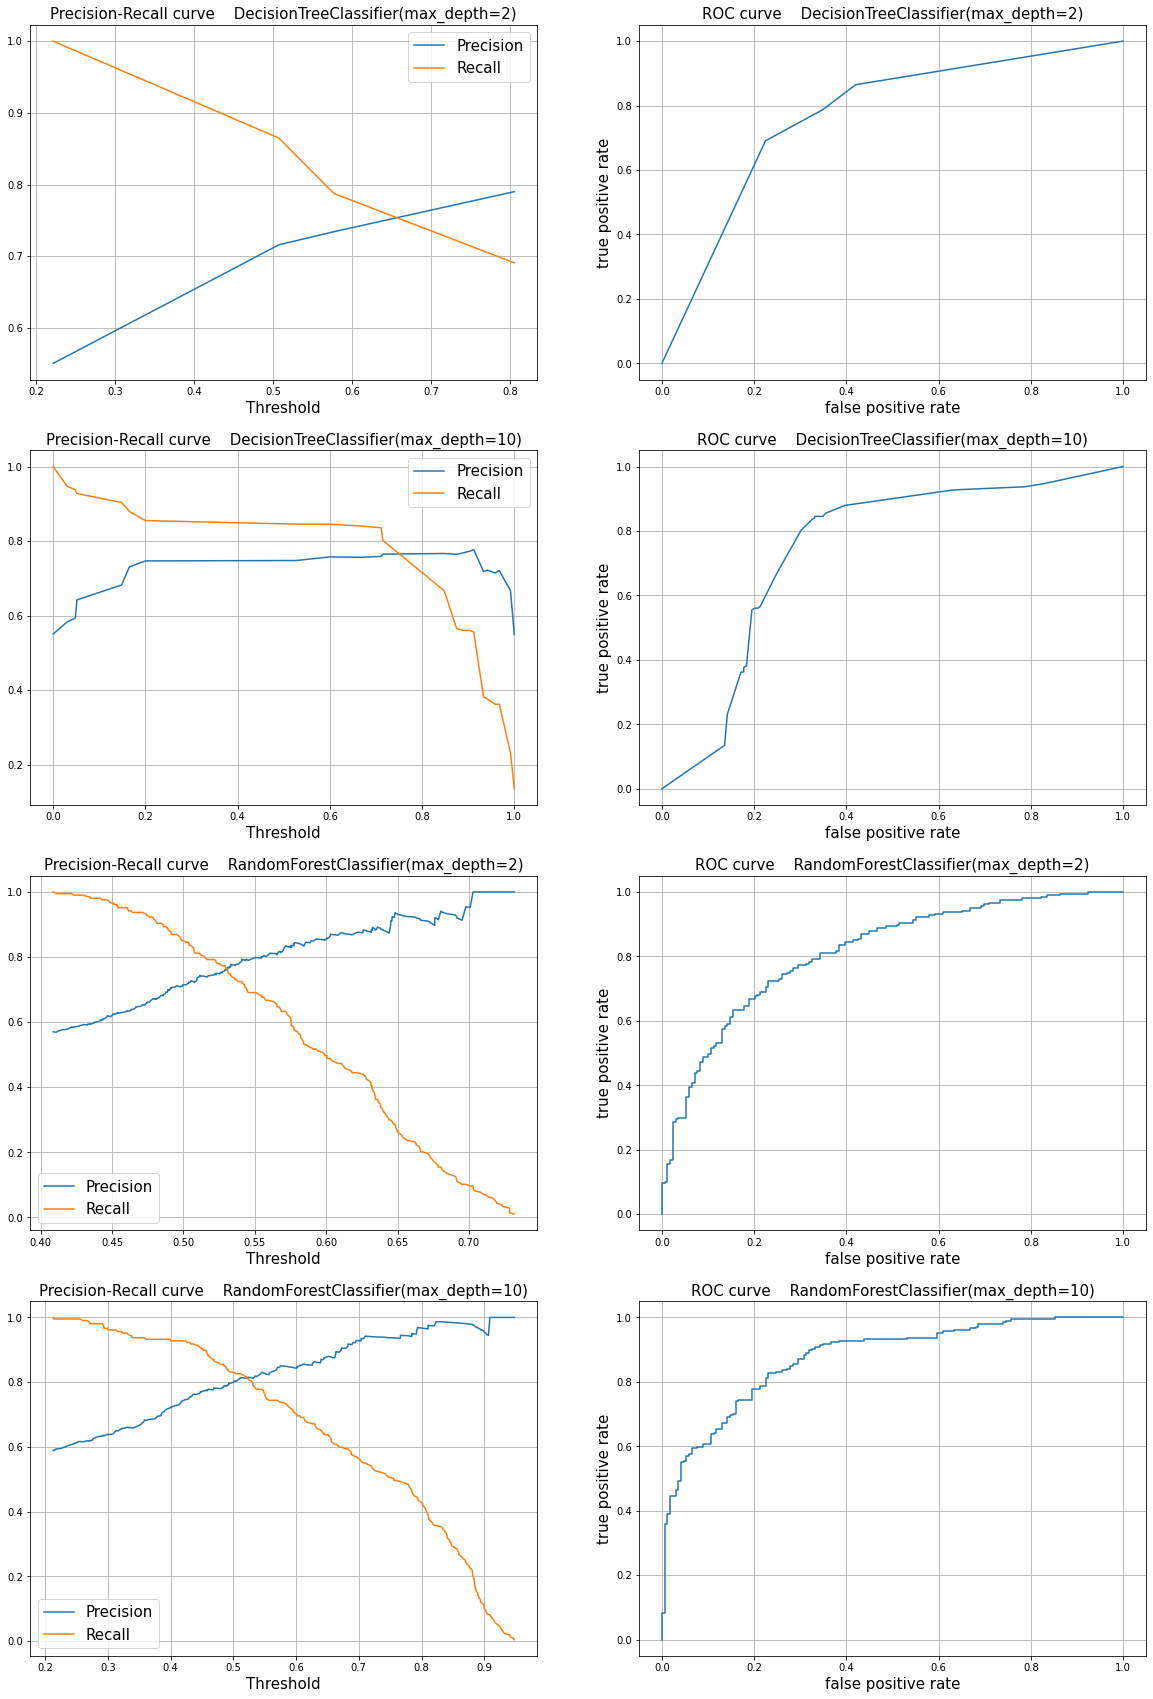

In [268]:
metrics_table = PrettyTable(["Model Type", "Accuracy", "Precision", "Recall", "F1", "LogLoss"])

models = {
    "ShortTree": DecisionTreeClassifier(max_depth=2),
    "DeepTree": DecisionTreeClassifier(max_depth=10),
    "ShortForest": RandomForestClassifier(max_depth=2),
    "DeepForest": RandomForestClassifier(max_depth=10)
}

plt.figure(figsize=(20,30))

iter = 0
for i in models.keys():
    model = models[i]
    ## PART 1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ## PART 2
    metrics_table.add_row([str(models[i]),  m.accuracy_score(y_test, y_pred), 
                                            m.precision_score(y_test, y_pred), 
                                            m.recall_score(y_test, y_pred), 
                                            m.f1_score(y_test, y_pred), 
                                            m.log_loss(y_test, y_pred)])

    ## PART 3
    # Labels prediction
    y_out = model.predict(X_test)
    # Probabilities for the objects in the test sample
    y_out_proba = model.predict_proba(X_test)
    # Prec-Rec curve
    prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
    # ROC-curve
    fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

    plt.subplot(4, 2, iter*2+1)
    plt.grid()
    plt.plot(thresh, prec[:-1], label="Precision")
    plt.plot(thresh, rec[:-1], label="Recall")
    plt.xlabel(u"Threshold",fontsize = 15)
    plt.title(u'Precision-Recall curve    '+str(models[i]),fontsize = 15)
    plt.legend(fontsize = 15)

    plt.subplot(4, 2, iter*2+2)
    plt.plot(fpr, tpr)
    plt.grid()
    plt.xlabel("false positive rate",fontsize = 15)
    plt.ylabel("true positive rate",fontsize = 15)
    plt.title(u"ROC curve    "+str(models[i]),fontsize = 15)

    iter += 1

print(metrics_table)

In [261]:
## PART 4

# Function to make predictions based on probabilities and threshold
def predict_with_threshold(prob_matrix, threshold: int):
    prob_array = np.array(prob_matrix[:,1]) # Make a copy, not a representation
    first_class = 1
    zeros_class = 0

    for prob in np.nditer(prob_array, op_flags = ['readwrite']):
        if prob > threshold:
            prob[...] = first_class
        else:
            prob[...] = zeros_class

    return prob_array

# Take the results of the last classifier - RandomForestClassifier (Deep)
# Moving the threshold to ~0.32 one can gain high recall value (about 0.95) with worse Precision.
# So this this model avoids False Negative errors
y_out = predict_with_threshold(y_out_proba, 0.32)

# Metrics for this binary classification with moved threshold
print('Accuracy:  ', m.accuracy_score(y_test,y_out))
print('Precision: ', m.precision_score(y_test,y_out))
print('Recall:    ', m.recall_score(y_test,y_out))
print('Log_loss:  ', m.log_loss(y_test, y_pred))
print('F1-score:  ', m.f1_score(y_test,y_out))

# As

Accuracy:   0.7047872340425532
Precision:  0.6568627450980392
Recall:     0.9710144927536232
Log_loss:   6.797616584874705
F1-score:   0.783625730994152
